## Image Gradients

* https://paper.dropbox.com/doc/Image-Gradients-LL7Ogk7NmBPsQ4BY43P8n

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import os
import sys
p = os.path.join(os.path.dirname('__file__'), '..')
sys.path.append(p)
from common import *

In [9]:
DATA_DIR = '../data/'
img_fpath = os.path.join(DATA_DIR, 'volleyball_frame_00665.png')
img_fpath2 = str(Path(DATA_DIR, 'segmentation', 'headshot.jpg'))
FIGSIZE=(6,6)

In [10]:
def plot_img(arr, fs=FIGSIZE, cmap='gray', title=None):
    plt.figure(figsize=fs)
    plt.imshow(arr, cmap=cmap)
    plt.title(title)
    plt.show()

def load_cv2_img(fpath, w=None, h=None, colorspace=None):
    img = cv2.imread(fpath)
    if colorspace is not None:
        img = cv2.cvtColor(img, colorspace)
    if None not in [w,h]:
        img = cv2.resize(img, (w, h), interpolation=cv2.INTER_CUBIC)
    return img

## Image Gradient

* Measure intensity changes between pixels
* Large intensity changes equal edges
* Naive gradient filter
    * Take the difference between right/left or top/bottom pixels

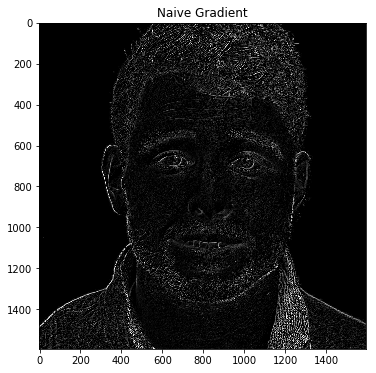

In [11]:
grad_x = np.array([
    [-1, 0, 1],
    [-1, 0, 1],
    [-1, 0, 1]
])
grad_y = np.array([
    [-1, -1, -1],
    [0,  0,  0],
    [1,  1,  1]
])
img = load_cv2_img(img_fpath2, colorspace=cv2.COLOR_BGR2GRAY)
x = cv2.filter2D(img.copy(), -1, grad_x)
y = cv2.filter2D(img.copy(), -1, grad_y)
plot_img(x+y, title="Naive Gradient")

## Sobel Filter

* Slightly smart gradient filter

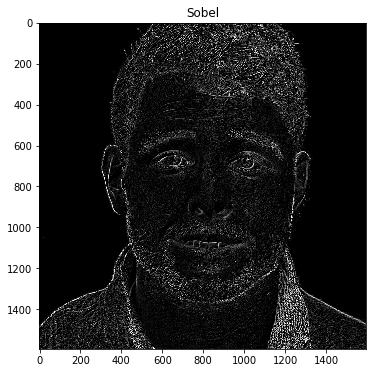

In [12]:
## Sobel Filter
sobel_x = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])
sobel_y = np.array([
    [-1, -2, -1],
    [0,  0,  0],
    [1,  2,  1]
])
img = load_cv2_img(img_fpath2, colorspace=cv2.COLOR_BGR2GRAY)
x = cv2.filter2D(img.copy(), -1, sobel_x)
y = cv2.filter2D(img.copy(), -1, sobel_y)
plot_img(y+x, title="Sobel")

## Difference of Gaussians

* Raw image gradients are noisy, so let's blur first to focus on the important parts!
* Apply two gaussian filters with different sigmas (deviations)
* One will capture large variations, the other small fine variations
* Subtract the difference 

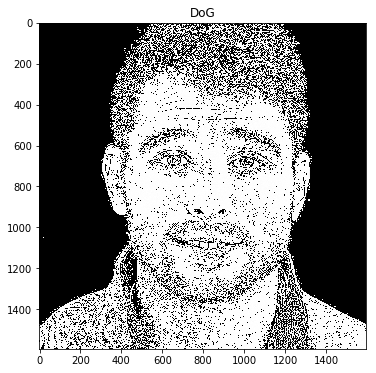

In [13]:
img = load_cv2_img(img_fpath2, colorspace=cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
gray1 = cv2.GaussianBlur(gray.copy(), ksize=(5,5), sigmaX=1)
#plot_img(gray1, title="Gaussian Sigma_1")
gray2 = cv2.GaussianBlur(gray.copy(), ksize=(5,5), sigmaX=5)
#plot_img(gray2, title="Gaussian Sigma_5")
plot_img(gray2-gray1, title="DoG")

## Laplacian

* https://docs.opencv.org/3.2.0/d5/d0f/tutorial_py_gradients.html

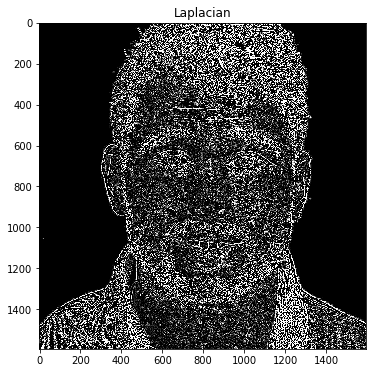

In [14]:
laplacian = np.array([
    [0, 1, 0],
    [1, -4, 1],
    [0, 1, 0]
]).astype(float)

img = load_cv2_img(img_fpath2, colorspace=cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
img = cv2.Laplacian(gray.copy(), -1, ksize=5)
plot_img(img, title="Laplacian")

## Canny Edge Detector

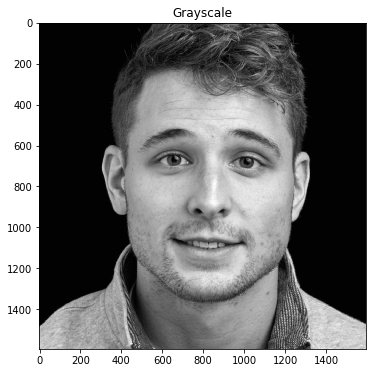

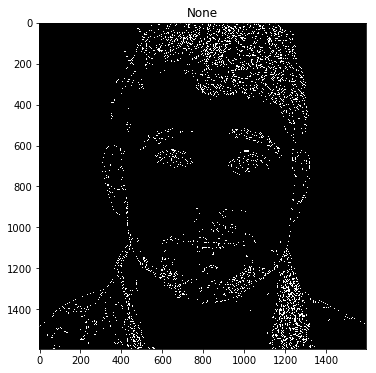

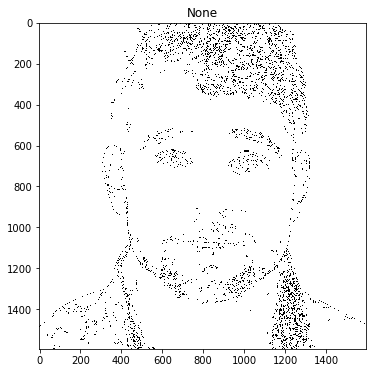

In [27]:
img = load_cv2_img(img_fpath2, colorspace=cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
gray = cv2.GaussianBlur(gray, ksize=(5,5), sigmaX=5)
plot_img(gray, title="Grayscale")

# use Canny edge detector to find edges in the image.  The thresholds determine how
# weak or strong an edge will be detected.  These can be tweaked.
lower_threshold = 25
upper_threshold = 75
edges = cv2.Canny(gray, lower_threshold, upper_threshold)
plot_img(edges)
plot_img(cv2.bitwise_not(edges))